**Lesson 1 Hands-On**      30 points

**Directions**

Lesson 1 Hands-On
This Hands-­On will be graded, so make sure you complete each part. When you are done, please submit one document with all of your findings for grading.

Caution!
Do not submit your project until you have completed all requirements, as you will not be able to resubmit.

Now that you've learned your first machine learning algorithm, it's time to put that knowledge to work. In this Hands-On exercise you will create a project which will require you to take data, clean it so that it's usable, and finally create a linear model to predict unknown data. This Hands-On project should be completed using the browser for downloading data and Python for plotting and modeling the data.

You should leverage what you have learned about machine learning and data modeling. Import the diamonds dataset from seaborn using this code:

import seaborn as sns
from sklearn.utils import shuffle
Diamonds = shuffle(sns.load_dataset('diamonds'))
If seaborn isn't working for you, click here to download the data.

And use the following variables to predict the price of diamonds:

carat
cut
color
clarity
You will need to utilize the train_test_split() method as well as LinearRegression() to train and test your algorithm. Then, leverage your knowledge of cross-validation and Python programming to cross-validate the work you did. Note the variation in model accuracy once you have cross-validated the model using 5 iterations.

Your final product should be a slide presentation that explains the process you took to analyze the data and the conclusions you found. Make sure you can explain everything in the most basic of ways and that you have included visualizations. In addition, please attach your Python code for grading.



Import Libraries

In [24]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


Load the data

In [2]:
import seaborn as sns
from sklearn.utils import shuffle
Diamonds = shuffle(sns.load_dataset('diamonds'))

Explore the data

In [3]:
Diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
10422,0.90,Ideal,H,VVS1,61.9,57.0,4783,6.19,6.24,3.85
1358,0.90,Good,F,SI2,64.2,62.0,2964,6.08,6.00,3.88
44866,0.73,Good,E,I1,56.9,60.0,1628,5.98,5.93,3.39
30241,0.33,Ideal,E,VS2,61.5,57.0,723,4.41,4.47,2.73
8825,1.12,Very Good,G,SI2,63.3,58.0,4478,6.70,6.63,4.22


In [15]:
Diamonds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53940 entries, 10422 to 11006
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.4 MB


In [10]:
Diamonds['carat'].min()

0.2

In [11]:
Diamonds['carat'].max()

5.01

In [12]:
Diamonds['cut'].unique()

['Ideal', 'Good', 'Very Good', 'Premium', 'Fair']
Categories (5, object): ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']

In [13]:
Diamonds['color'].unique()

['H', 'F', 'E', 'G', 'I', 'D', 'J']
Categories (7, object): ['D', 'E', 'F', 'G', 'H', 'I', 'J']

In [14]:
Diamonds['clarity'].unique()

['VVS1', 'SI2', 'I1', 'VS2', 'VS1', 'SI1', 'VVS2', 'IF']
Categories (8, object): ['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1']

**Carat Weight:** 0.2 - 5.01

**Cut:** Fair, Good, Very Good, Premium, Ideal

**Color:** from J (Worst) to D (Best)

**Clarity:** I1 (Worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (Best)




We are going to use the cut, carat, color, and clarity variables to predict the price of diamonds. Those are our independent variables, and we have one dependent variable which is price. As it can be seen cut, color, and clarity are string variables. To move forward with the linear regression we have to convert them to numeric variables. 

**DATA WRANGLING**

**CONVERT STRING VARIABLES TO NUMERIC VARIABLE**

To perform this part of analysis, It is created dictionary for each of categorical variables then is mapped in Diamond dataset.

In [16]:
cut_dict ={"Fair":1,"Good":2,"Very Good":3,"Premium":4,"Ideal":5}
color_dict = {"J": 1,"I": 2,"H": 3,"G": 4,"F": 5,"E": 6,"D": 7}
clarity_dict = {"I1": 1, "SI2": 2, "SI1": 3, "VS2": 4, "VS1": 5, "VVS2": 6, "VVS1": 7, "IF": 8}


Mapping in Diamond dataset

In [18]:
Diamonds['cut'] = Diamonds['cut'].map(cut_dict)
Diamonds['clarity'] = Diamonds['clarity'].map(clarity_dict)
Diamonds['color'] = Diamonds['color'].map(color_dict)

Let's look at our dataset again

In [19]:
Diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
10422,0.90,5,3,7,61.9,57.0,4783,6.19,6.24,3.85
1358,0.90,2,5,2,64.2,62.0,2964,6.08,6.00,3.88
44866,0.73,2,6,1,56.9,60.0,1628,5.98,5.93,3.39
30241,0.33,5,6,4,61.5,57.0,723,4.41,4.47,2.73
8825,1.12,3,4,2,63.3,58.0,4478,6.70,6.63,4.22


Mission Acomplished! Now we can define x and y variables to perform machine learning part. Since data is labeled, this part of the analysis leads Supervised Machine Learning part.

In [20]:
x = Diamonds[['carat','cut', 'color', 'clarity']]
y = Diamonds['price']

We are going to split data as test and trainee data using train_test_split() function. We are going to use 40-60 ratio for this analysis which means  40% of your data reserved for testing, and 60% of data for training.

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = .4, random_state=101)

In [22]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(32364, 4) (32364,)
(21576, 4) (21576,)


This outcomes showed us that our training data has 4 columns and 32364 rows and test data has 4 columns and 21576 rows.

**Create the Linear Regression Model**


In [27]:
lm = LinearRegression()
lm.fit(x_train, y_train)
LinearRegression()

LinearRegression()

Now our model is created. It is time to check if it is good. Now we can see the predictions it has made about diamond price:

In [28]:
predictions = lm.predict(x_test)
predictions

array([ 262.7573754 , 1584.6401556 , 3800.2413568 , ..., 1314.95482865,
       6316.02883998, -600.24923928])

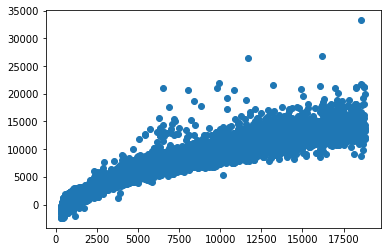

In [29]:
plt.scatter(y_test, predictions)

Accuracy looks very good to me with looking at this scatter plot.We can also check accuracy with .accuracy function.

In [30]:
print("Score:", lm.score(x_test, y_test))

Score: 0.9042683884095138


This means our model is accurate approximately 90.4% of the time, which is really good to me:)

Now It is time to examine errors and then apply k cross check validation to confirm our model's accuracy.

**Examining Errors**

**Mean Absolute Error (MAE)**

**Definition:** The mean of the difference between the predicted value and the real value.



In [31]:
metrics.mean_absolute_error(y_test, predictions)

857.7246526552057

This value looks good if we think the max value for y_test is around 20K and for prediction is around 34K. Because value is close to zero side.

**Mean Squared Error (MSE)**

**Definition:**	The square of the mean absolute error.


In [32]:
metrics.mean_squared_error(y_test, predictions)


1550930.3568738468

This error is too large to me. 

**Root Mean Squared Error (RMSE)**

**Definition:** The square root of mean squared error.

In [33]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))


1245.3635440600656

This error is also acceptable.


**K-Folds Cross Validation**

**Definition:** Reserve additional data for train-test-split testing by repeating the process.

In [34]:
kfold = KFold(n_splits = 3, shuffle=True, random_state=1)
for train, test in kfold.split(x,y):
     print('train: %s, test: %s' % (train,test))

train: [    0     1     4 ... 53937 53938 53939], test: [    2     3     8 ... 53932 53934 53935]
train: [    1     2     3 ... 53935 53938 53939], test: [    0     4     6 ... 53933 53936 53937]
train: [    0     2     3 ... 53935 53936 53937], test: [    1     5     9 ... 53931 53938 53939]


Diamond data splitted 6 different data set (3 sets for training, 3 sets for tests) then our model applied 3 taining-test data sets then accuracy checked for 3 test-training data sets. Let's look at the result

In [35]:
print(cross_val_score(lm, x,y, cv=3))

[0.90364889 0.90505724 0.90359924]


Accuracies are almost same with our previous result(90.4%). This shows that our model fits very well with data.